In [1]:
### 
import random
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

def generate_time(num=None, _random=False):
    if not _random:
        Inter_arrival = [0.4, 1.2, 0.5, 1.7, 0.2, 1.6, 0.2, 1.4, 1.9]
        Service_arrival = [2.0,0.7,0.2,1.1, 3.7, 0.6, 0, 0, 0]
    else:
        Inter_arrival = [1* random.random() for _ in range(num)]
        Service_arrival = [1*random.random() for _ in range(num)]
    return Inter_arrival, Service_arrival
def caculate_leave_time(Arrive_time, Service_arrival):
    Leave_time = []
    for i in range(len(Arrive_time)):
        if i == 0:
            Leave_time.append(Arrive_time[i]+Service_arrival[i])
        else:
            if Leave_time[i-1] > Arrive_time[i]:
                Leave_time.append(Leave_time[i-1]+Service_arrival[i])
            else:
                Leave_time.append(Arrive_time[i]+Service_arrival[i])
    return Leave_time
def caculate_queue(Arrive_time, Leave_time):
    init_queue = 0
    i = 1
    j = 1
    x = [(0,0)]
    while True:
        a = Arrive_time[i]
        b = Leave_time[j-1]
    #   print('->>>>>',a,b, i, j)
        if a < b:
            init_queue += 1
            i += 1
#             print(a,init_queue)
            x.append((a,init_queue))
        elif a > b:
            init_queue -=1
            if j == i:
    #       print(j,i)
                init_queue+=1
                i = i+1
                j = i
#                 print(b,init_queue)
#                 print(a,init_queue)
                x.append((a,init_queue))
                x.append((b,init_queue))
            else:
                j += 1
#                 print(b, init_queue)
                x.append((b,init_queue))
        if i >= len(Leave_time):
            break
    return x
def plot_queue(x):
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    x = np.array(x)
    x_ext = list(zip(x[1:,0],x[0:-1,1]))
    x = x.tolist()
    x_f = []
    for i in range(len(x)):
        x_f.append(x[i])
        if i!=len(x)-1:
            x_f.append(x_ext[i])
    x = np.array(x_f)
    plt.plot(x[:,0],x[:,1])
    plt.grid()
    plt.show()


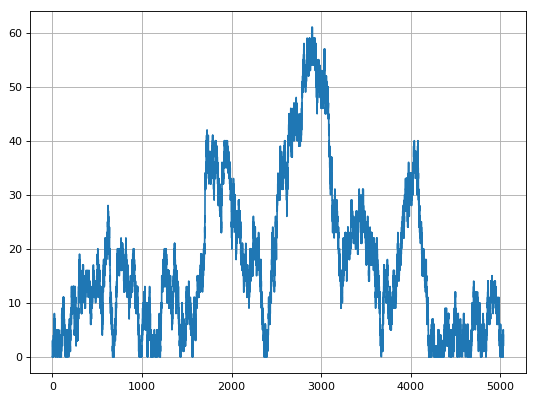

In [15]:
Inter, Service = generate_time(10000, True)
Arrive = [float(sum(Inter[0:i+1])) for i in range(len(Inter))]
Leave = caculate_leave_time(Arrive, Service)
Queue = caculate_queue(Arrive, Leave)
plot_queue(Queue)

In [3]:
print(Leave)
print(Arrive)

[2.4, 3.0999999999999996, 3.3, 4.9, 8.600000000000001, 9.200000000000001, 9.200000000000001, 9.200000000000001, 9.200000000000001]
[0.4, 1.6, 2.1, 3.8, 4.0, 5.6, 5.8, 7.199999999999999, 9.1]
